In [1]:
import numpy as np
import pandas as pd
import sys
import nltk
import re
import gensim
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from gensim import corpora,models
from gensim.utils import simple_preprocess
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud 

data=pd.read_csv('./abcnews-date-text.csv')
# take 5000 news as input data
data_samples=data['headline_text'][:5000]
data=data['headline_text'][:5000]

cleanedData = []
# print(data)
lemma = WordNetLemmatizer()
swords = stopwords.words("english")
for text in data:
    
    # Cleaning links
    text = re.sub(r'http\S+', '', text)
    
    # Cleaning everything except alphabetical and numerical characters
    text = re.sub("[^a-zA-Z0-9]"," ",text)
    
    # Tokenizing and lemmatizing
    text = nltk.word_tokenize(text.lower())
    text = [lemma.lemmatize(word) for word in text]
    
    # Removing stopwords
    text = [word for word in text if word not in swords]

    
    cleanedData.append(text)
# print(cleanedData)

dictionary = corpora.Dictionary(cleanedData)
# print(dictionary)
# print(cleanedData)
corpus = [dictionary.doc2bow(text) for text in cleanedData]
# print(corpus)
print(dictionary[0])
print(dictionary[1])

aba
broadcasting


In [14]:
from pprint import pprint
models=[]
perplexities=[]
topics=[10,20,40,60,80,100,150,200,300,400,500]
for topic in topics:
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           num_topics=topic,
                                           id2word=dictionary)
    perplexity=lda_model.log_perplexity(corpus)
    print('topic is {}\nPerplexity: {}'.format(topic,perplexity))
    perplexities.append(perplexity)

topic is 10
Perplexity: -9.484841496158534
topic is 20
Perplexity: -11.63020825383134
topic is 40
Perplexity: -14.638394460872304
topic is 60
Perplexity: -18.87906258944877
topic is 80
Perplexity: -32.509986882944496
topic is 100
Perplexity: -84.62794108392701
topic is 150
Perplexity: -299.24908447265625
topic is 200
Perplexity: -398.67498779296875
topic is 300
Perplexity: -597.8613891601562
topic is 400
Perplexity: -797.2803955078125
topic is 500
Perplexity: -996.8274536132812


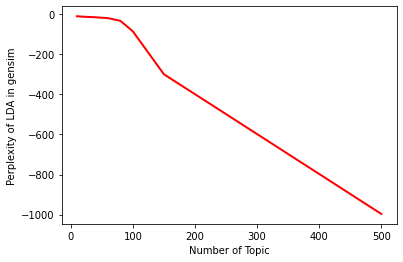

In [15]:
plt.plot(topics,perplexities,color="red",linewidth=2)
plt.xlabel("Number of Topic")
plt.ylabel("Perplexity of LDA in gensim")
plt.show()